<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.742650,32.655059,38.057607,-16.266998,149.188318,167.670645,-18.482327
1,0.0,1.0,57.865002,78.600554,34.619300,-14.541002,166.543854,183.836510,-17.292656
2,0.0,2.0,68.132802,27.272754,47.472356,-24.848568,128.029344,150.436987,-22.407642
3,0.0,3.0,50.222759,58.480617,58.857116,27.300983,204.861475,174.594097,30.267378
4,0.0,4.0,91.041814,21.142324,45.536706,1.412041,169.132885,169.251742,-0.118857
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.995421,54.256268,73.151666,-22.467989,160.935365,182.180452,-21.245087
59996,999.0,56.0,40.704722,62.423880,73.104312,-18.564341,167.668573,185.856455,-18.187882
59997,999.0,57.0,23.473663,80.976120,31.234749,35.956833,181.641365,138.804070,42.837295
59998,999.0,58.0,83.910633,29.157341,20.518196,-34.910159,108.676011,128.944715,-20.268704


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.742650,32.655059,38.057607,-16.266998,149.188318,167.670645,-18.482327
1,0.0,1.0,57.865002,78.600554,34.619300,-14.541002,166.543854,183.836510,-17.292656
2,0.0,2.0,68.132802,27.272754,47.472356,-24.848568,128.029344,150.436987,-22.407642
3,0.0,3.0,50.222759,58.480617,58.857116,27.300983,204.861475,174.594097,30.267378
4,0.0,4.0,91.041814,21.142324,45.536706,1.412041,169.132885,169.251742,-0.118857
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.995421,54.256268,73.151666,-22.467989,160.935365,182.180452,-21.245087
59996,999.0,56.0,40.704722,62.423880,73.104312,-18.564341,167.668573,185.856455,-18.187882
59997,999.0,57.0,23.473663,80.976120,31.234749,35.956833,181.641365,138.804070,42.837295
59998,999.0,58.0,83.910633,29.157341,20.518196,-34.910159,108.676011,128.944715,-20.268704


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    84.742650  32.655059  38.057607  ...  149.188318  167.670645 -18.482327
      1.0    57.865002  78.600554  34.619300  ...  166.543854  183.836510 -17.292656
      2.0    68.132802  27.272754  47.472356  ...  128.029344  150.436987 -22.407642
      3.0    50.222759  58.480617  58.857116  ...  204.861475  174.594097  30.267378
      4.0    91.041814  21.142324  45.536706  ...  169.132885  169.251742  -0.118857
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   45.995421  54.256268  73.151666  ...  160.935365  182.180452 -21.245087
      56.0   40.704722  62.423880  73.104312  ...  167.668573  185.856455 -18.187882
      57.0   23.473663  80.976120  31.234749  ...  181.641365  138.804070  42.837295
      58.0   83.910633  29.157341  20.518196  ...  108.676011  128.944715 -20.268704
      59.0   23.787798  76.340760  67.327144  ...  173.200289  177.414805  -4.214516

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    84.742650  32.655059  38.057607  ...  149.188318  167.670645 -18.482327
      1.0    57.865002  78.600554  34.619300  ...  166.543854  183.836510 -17.292656
      2.0    68.132802  27.272754  47.472356  ...  128.029344  150.436987 -22.407642
      3.0    50.222759  58.480617  58.857116  ...  204.861475  174.594097  30.267378
      4.0    91.041814  21.142324  45.536706  ...  169.132885  169.251742  -0.118857
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   45.995421  54.256268  73.151666  ...  160.935365  182.180452 -21.245087
      56.0   40.704722  62.423880  73.104312  ...  167.668573  185.856455 -18.187882
      57.0   23.473663  80.976120  31.234749  ...  181.641365  138.804070  42.837295
      58.0   83.910633  29.157341  20.518196  ...  108.676011  128.944715 -20.268704
      59.0   23.787798  76.340760  67.327144  ...  173.200289  177.414805  -4.214516

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.742650,32.655059,38.057607,-16.266998,149.188318,167.670645,-18.482327
1,0.0,1.0,57.865002,78.600554,34.619300,-14.541002,166.543854,183.836510,-17.292656
2,0.0,2.0,68.132802,27.272754,47.472356,-24.848568,128.029344,150.436987,-22.407642
3,0.0,3.0,50.222759,58.480617,58.857116,27.300983,204.861475,174.594097,30.267378
4,0.0,4.0,91.041814,21.142324,45.536706,1.412041,169.132885,169.251742,-0.118857
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.995421,54.256268,73.151666,-22.467989,160.935365,182.180452,-21.245087
59996,999.0,56.0,40.704722,62.423880,73.104312,-18.564341,167.668573,185.856455,-18.187882
59997,999.0,57.0,23.473663,80.976120,31.234749,35.956833,181.641365,138.804070,42.837295
59998,999.0,58.0,83.910633,29.157341,20.518196,-34.910159,108.676011,128.944715,-20.268704


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    84.742650  32.655059  38.057607  ...  149.188318  167.670645 -18.482327
      1.0    57.865002  78.600554  34.619300  ...  166.543854  183.836510 -17.292656
      2.0    68.132802  27.272754  47.472356  ...  128.029344  150.436987 -22.407642
      3.0    50.222759  58.480617  58.857116  ...  204.861475  174.594097  30.267378
      4.0    91.041814  21.142324  45.536706  ...  169.132885  169.251742  -0.118857
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   45.995421  54.256268  73.151666  ...  160.935365  182.180452 -21.245087
      56.0   40.704722  62.423880  73.104312  ...  167.668573  185.856455 -18.187882
      57.0   23.473663  80.976120  31.234749  ...  181.641365  138.804070  42.837295
      58.0   83.910633  29.157341  20.518196  ...  108.676011  128.944715 -20.268704
      59.0   23.787798  76.340760  67.327144  ...  173.200289  177.414805  -4.214516

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

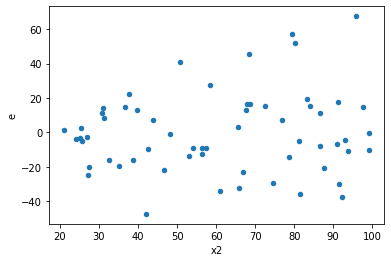

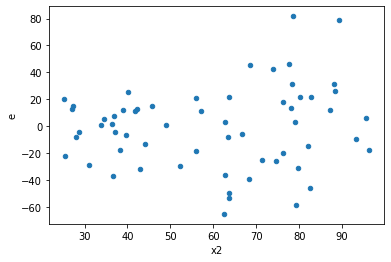

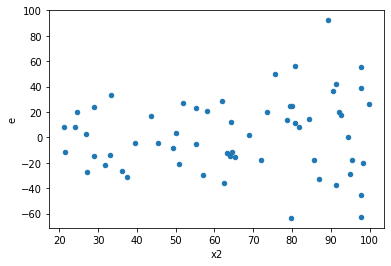

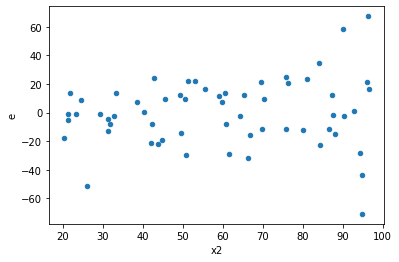

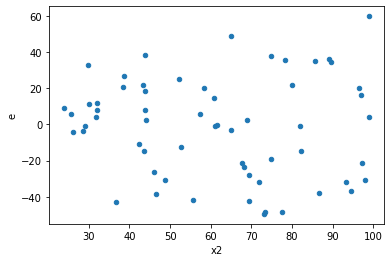

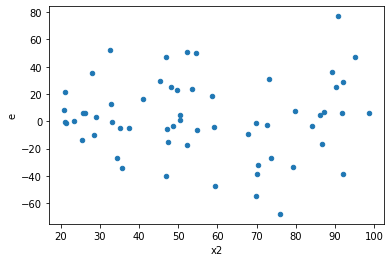

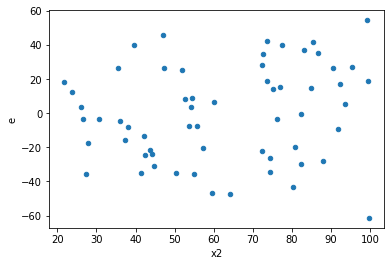

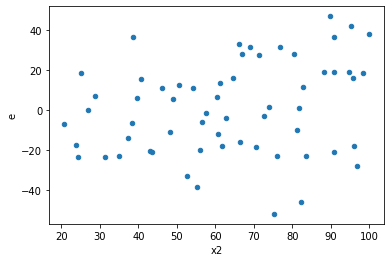

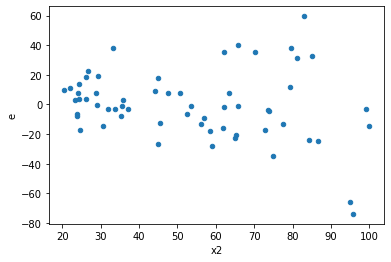

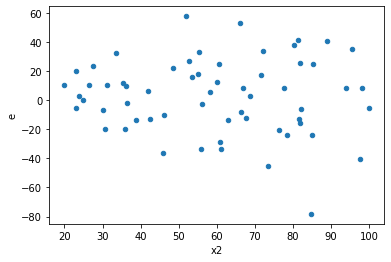

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,15293.470820042368,6327.142512678166,764.6735410021184,316.3571256339083,2.4171212817472822,0.04911263877211414,0.9754436806139429,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,28163.677056461045,6783.258135945105,1408.1838528230523,339.16290679725523,4.151939450338642,0.0019205658917091917,0.9990397170541454,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,35247.72239183042,6071.200454318828,1762.386119591521,303.5600227159414,5.805725351525248,0.00016639978051191662,0.999916800109744,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,18958.416555870415,4364.967761994334,947.9208277935207,218.2483880997167,4.34331193026003,0.001406817294536511,0.9992965913527317,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,20060.637616233867,10019.455271866338,1003.0318808116933,500.9727635933169,2.0021684883969892,0.11954570841801826,0.9402271457909909,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,13650.872408956648,10313.011433768226,682.5436204478324,515.6505716884113,1.3236553160659896,0.5261803788295443,0.7369098105852279,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,16401.767421111836,11639.44548299366,820.0883710555918,581.972274149683,1.4091536787621353,0.4385036278798371,0.7807481860600815,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,15507.051009609862,5480.01180569799,775.3525504804932,274.0005902848995,2.829747737675672,0.021127483034185435,0.9894362584829073,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,20270.971759695483,3095.053659324715,1013.5485879847741,154.75268296623577,6.549473447293396,6.456292213319337e-05,0.9999677185389334,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,15293.470820042368,6327.142512678166,764.6735410021184,316.3571256339083,2.4171212817472822,0.04911263877211414,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,28163.677056461045,6783.258135945105,1408.1838528230523,339.16290679725523,4.151939450338642,0.0019205658917091917,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,35247.72239183042,6071.200454318828,1762.386119591521,303.5600227159414,5.805725351525248,0.00016639978051191662,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,18958.416555870415,4364.967761994334,947.9208277935207,218.2483880997167,4.34331193026003,0.001406817294536511,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,20060.637616233867,10019.455271866338,1003.0318808116933,500.9727635933169,2.0021684883969892,0.11954570841801826,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,13650.872408956648,10313.011433768226,682.5436204478324,515.6505716884113,1.3236553160659896,1.4738196211704557,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,16401.767421111836,11639.44548299366,820.0883710555918,581.972274149683,1.4091536787621353,0.4385036278798371,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,15507.051009609862,5480.01180569799,775.3525504804932,274.0005902848995,2.829747737675672,0.021127483034185435,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,20270.971759695483,3095.053659324715,1013.5485879847741,154.75268296623577,6.549473447293396,6.456292213319337e-05,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    802
Reject005=1 : Homoscedasticity      198
Name: Result_test, dtype: int64